In [20]:
import pandas as pd

In [21]:
heart = pd.read_csv('data/heart.csv')

In [22]:
heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [23]:
heart.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [24]:
heart['old'] = heart['age'].apply(lambda x: 1 if x>60 else 0)
heart['old'].sum()

79

In [25]:
def trestbps_mean(row):
    if row['sex'] == 1:
        if row['age'] <= 20:
            return 123
        if row['age'] >=21 and row['age'] <= 30:
            return 126
        if row['age'] >=31 and row['age'] <= 40:
            return 129
        if row['age'] >=41 and row['age'] <= 50:
            return 135
        if row['age'] >=51:
            return 142
    if row['sex'] == 2:
        if row['age'] <= 20:
            return 116
        if row['age'] >=21 and row['age'] <= 30:
            return 120
        if row['age'] >=31 and row['age'] <= 40:
            return 127
        if row['age'] >=41 and row['age'] <= 50:
            return 137
        if row['age'] >=51 and row['age'] <= 60:
            return 144
        if row['age'] >=61:
            return 159
heart['trestbps_mean'] = heart[['age', 'sex']].apply(trestbps_mean, axis = 1)
heart['trestbps_mean'][300]

142.0

In [26]:
import category_encoders as ce

In [27]:
encoder = ce.OneHotEncoder(cols = ['cp', 'restecg', 'slope', 'ca', 'thal'])
cols = encoder.fit_transform(heart[['cp', 'restecg', 'slope', 'ca', 'thal']])
heart = pd.concat([heart, cols], axis = 1)

In [28]:
print(heart)

     age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  ...  \
0     63    1   3       145   233    1        0      150      0      2.3  ...   
1     37    1   2       130   250    0        1      187      0      3.5  ...   
2     41    0   1       130   204    0        0      172      0      1.4  ...   
3     56    1   1       120   236    0        1      178      0      0.8  ...   
4     57    0   0       120   354    0        1      163      1      0.6  ...   
..   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...  ...   
298   57    0   0       140   241    0        1      123      1      0.2  ...   
299   45    1   3       110   264    0        1      132      0      1.2  ...   
300   68    1   0       144   193    1        1      141      0      3.4  ...   
301   57    1   0       130   131    0        1      115      1      1.2  ...   
302   57    0   1       130   236    0        0      174      0      0.0  ...   

     slope_3  ca_1  ca_2  c

In [29]:
heart = heart.drop(['cp', 'restecg', 'slope', 'ca', 'thal'], axis = 1)

In [30]:
heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 30 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   age            303 non-null    int64  
 1   sex            303 non-null    int64  
 2   trestbps       303 non-null    int64  
 3   chol           303 non-null    int64  
 4   fbs            303 non-null    int64  
 5   thalach        303 non-null    int64  
 6   exang          303 non-null    int64  
 7   oldpeak        303 non-null    float64
 8   target         303 non-null    int64  
 9   old            303 non-null    int64  
 10  trestbps_mean  207 non-null    float64
 11  cp_1           303 non-null    int64  
 12  cp_2           303 non-null    int64  
 13  cp_3           303 non-null    int64  
 14  cp_4           303 non-null    int64  
 15  restecg_1      303 non-null    int64  
 16  restecg_2      303 non-null    int64  
 17  restecg_3      303 non-null    int64  
 18  slope_1   

In [31]:
from sklearn import preprocessing

In [33]:
import numpy as np

In [34]:
r_scaler = preprocessing.RobustScaler()
heart['age'] = r_scaler.fit_transform(heart['age'].to_numpy().reshape(-1,1))
heart['trestbps'] = r_scaler.fit_transform(heart['trestbps'].to_numpy().reshape(-1,1))
heart['chol'] = r_scaler.fit_transform(heart['chol'].to_numpy().reshape(-1,1))
heart['thalach'] = r_scaler.fit_transform(heart['thalach'].to_numpy().reshape(-1,1))
heart['oldpeak'] = r_scaler.fit_transform(heart['oldpeak'].to_numpy().reshape(-1,1))

In [37]:
round(heart['chol'].std(),6)

0.816232

In [38]:
import matplotlib.pyplot as plt
import seaborn as sns

<Axes: >

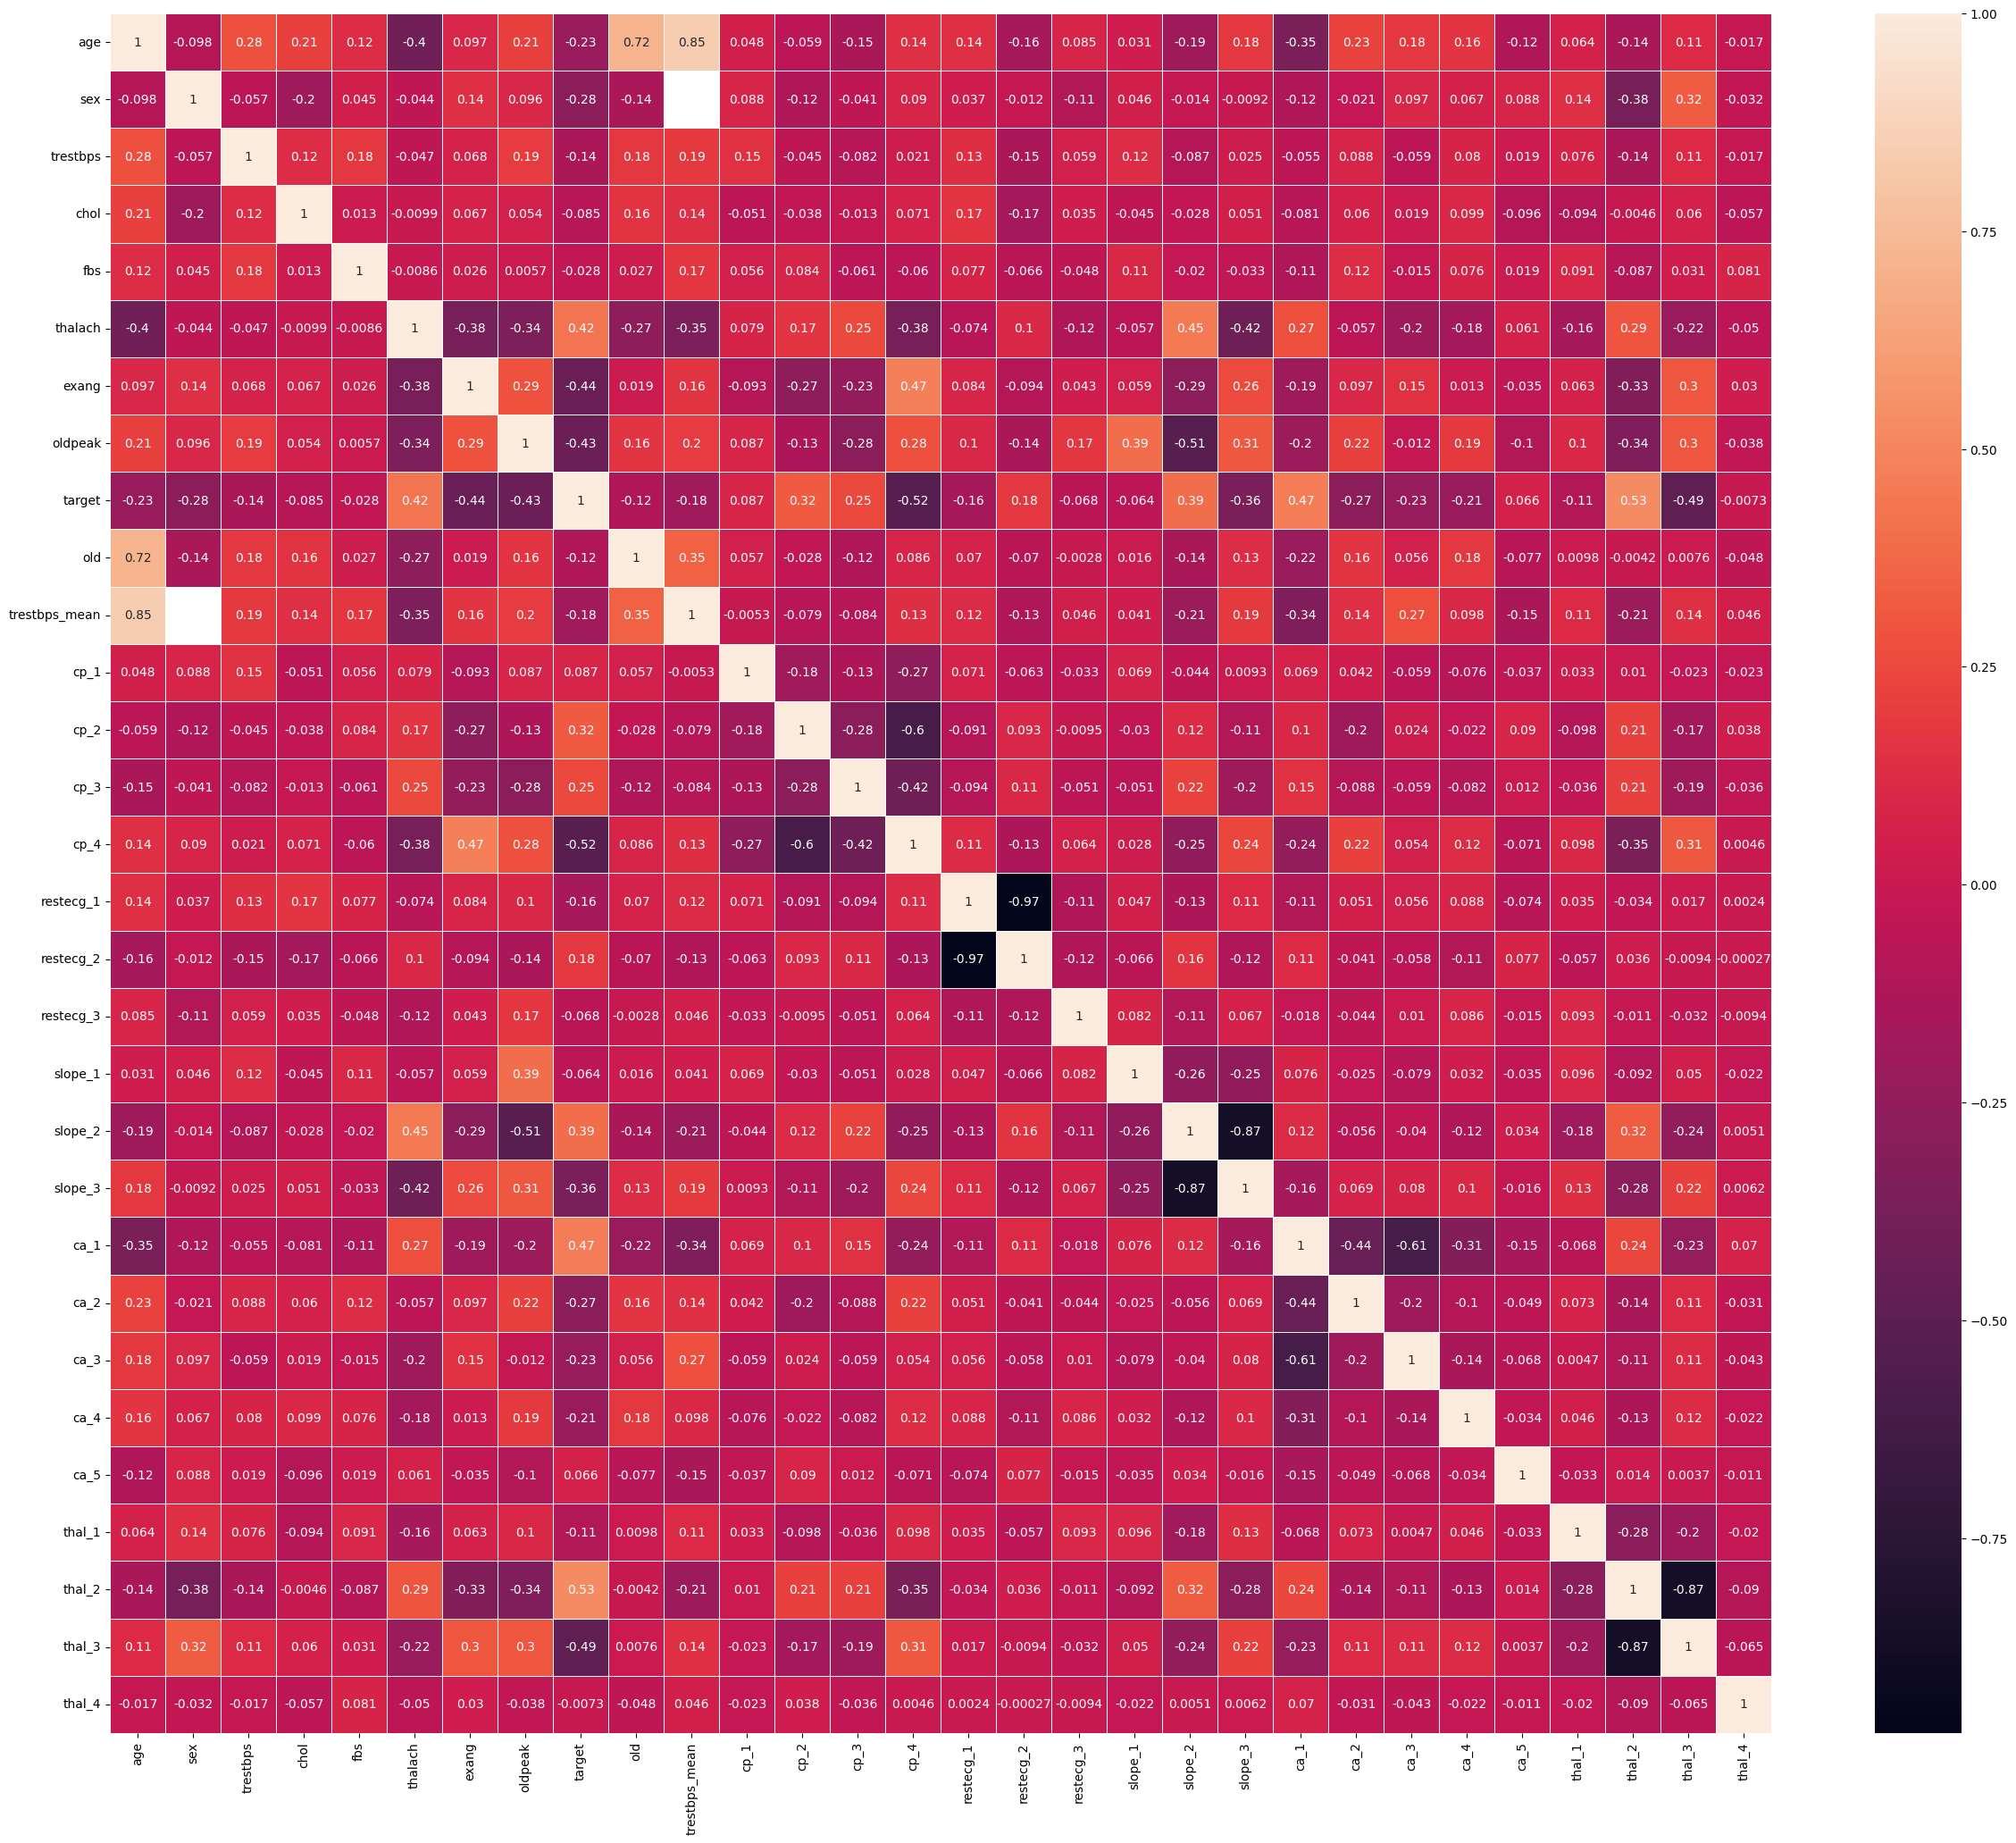

In [39]:
fig, ax = plt.subplots(figsize=(30,25))
sns.heatmap(heart.corr(), annot = True, linewidth = .5, ax=ax)